In [43]:
import pandas as pd 

In [44]:
%pwd

'e:\\GAN for Face expression Classification\\final deployment'

In [45]:
import pandas as pd

# Load the first CSV file
face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the second CSV file
voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\karti\AppData\Local\Temp\ipykernel_25032\3532732736.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\karti\AppData\Local\Temp\ipykernel_25032\3532732736.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [46]:
print(face_emotions)

                    time face_emotion
0    2024-04-25 02:24:44      neutral
1    2024-04-25 02:24:45        happy
2    2024-04-25 02:24:45      neutral
3    2024-04-25 02:24:46        happy
4    2024-04-25 02:24:46          sad
..                   ...          ...
420  2024-04-25 02:29:36      neutral
421  2024-04-25 02:29:36          sad
422  2024-04-25 02:29:36          sad
423  2024-04-25 02:29:37          sad
424  2024-04-25 02:29:37      neutral

[425 rows x 2 columns]


In [47]:
print(voice_emotions)

                   time voice emotion
0   2024-04-25 02:24:49       disgust
1   2024-04-25 02:24:56       disgust
2   2024-04-25 02:25:04       disgust
3   2024-04-25 02:25:12       disgust
4   2024-04-25 02:25:20         happy
5   2024-04-25 02:25:28         angry
6   2024-04-25 02:25:35       disgust
7   2024-04-25 02:25:43         angry
8   2024-04-25 02:25:51         happy
9   2024-04-25 02:25:59         angry
10  2024-04-25 02:26:07         angry
11  2024-04-25 02:26:14         angry
12  2024-04-25 02:26:22         angry
13  2024-04-25 02:26:30           sad
14  2024-04-25 02:26:38       disgust
15  2024-04-25 02:26:46       disgust
16  2024-04-25 02:26:54         angry
17  2024-04-25 02:27:01       disgust
18  2024-04-25 02:27:09         happy
19  2024-04-25 02:27:17         happy
20  2024-04-25 02:27:25         angry
21  2024-04-25 02:27:33         happy
22  2024-04-25 02:27:40       disgust
23  2024-04-25 02:27:48         happy
24  2024-04-25 02:27:56         happy
25  2024-04-

In [48]:
# Merge the DataFrames based on time
merged_df = pd.merge(face_emotions, voice_emotions, on='time', how='outer')

# Set 'time' column as index
merged_df.set_index('time', inplace=True)


# Display head of merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)



Merged DataFrame:
                    face_emotion voice emotion
time                                          
2024-04-25 02:24:44      neutral           NaN
2024-04-25 02:24:45        happy           NaN
2024-04-25 02:24:45      neutral           NaN
2024-04-25 02:24:46        happy           NaN
2024-04-25 02:24:46          sad           NaN
...                          ...           ...
2024-04-25 02:29:46          NaN       disgust
2024-04-25 02:29:53          NaN       disgust
2024-04-25 02:30:01          NaN       disgust
2024-04-25 02:30:09          NaN       disgust
2024-04-25 02:30:17          NaN           sad

[436 rows x 2 columns]


In [49]:
# Fill NaN values with a placeholder, limit to one consecutive NaN value
merged_df_filled = merged_df.fillna(method='ffill', limit=1)

# Reset index
merged_df_filled.reset_index(inplace=True)

# Display head of merged DataFrame after filling NaNs
print("\nMerged DataFrame with limited consecutive NaNs:")
print(merged_df_filled)


Merged DataFrame with limited consecutive NaNs:
                    time face_emotion voice emotion
0    2024-04-25 02:24:44      neutral           NaN
1    2024-04-25 02:24:45        happy           NaN
2    2024-04-25 02:24:45      neutral           NaN
3    2024-04-25 02:24:46        happy           NaN
4    2024-04-25 02:24:46          sad           NaN
..                   ...          ...           ...
431  2024-04-25 02:29:46          NaN       disgust
432  2024-04-25 02:29:53          NaN       disgust
433  2024-04-25 02:30:01          NaN       disgust
434  2024-04-25 02:30:09          NaN       disgust
435  2024-04-25 02:30:17          NaN           sad

[436 rows x 3 columns]


C:\Users\karti\AppData\Local\Temp\ipykernel_25032\2794070047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled = merged_df.fillna(method='ffill', limit=1)


In [50]:
merged_df_filled.columns

Index(['time', 'face_emotion', 'voice emotion'], dtype='object')

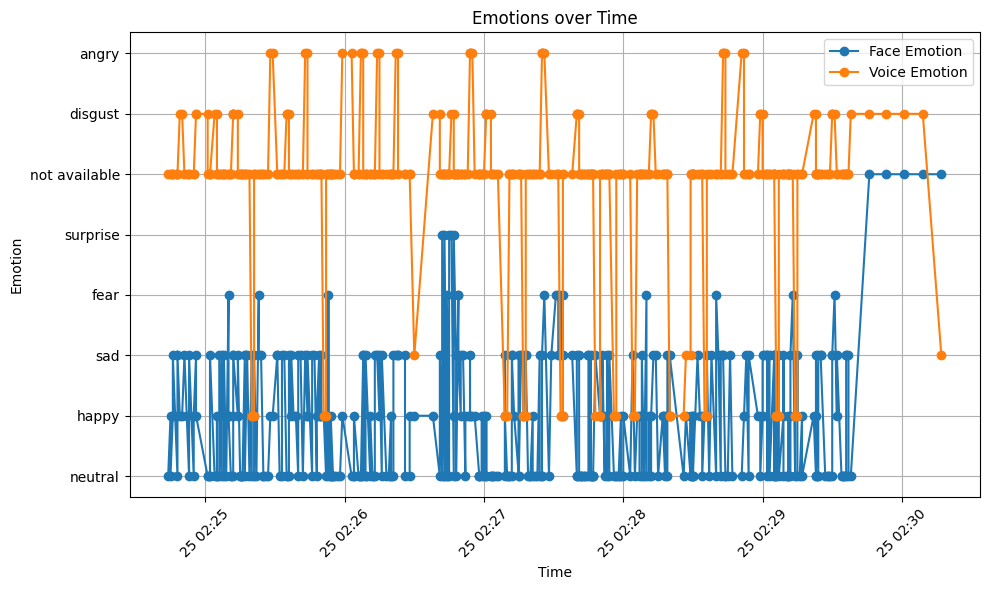

In [51]:
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format
merged_df_filled['time'] = pd.to_datetime(merged_df_filled['time'])

# Set 'time' column as index
merged_df_filled.set_index('time', inplace=True)

# Fill NaN values with a placeholder
merged_df_filled = merged_df_filled.fillna('not available')

# Plot emotions over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['face_emotion'], label='Face Emotion', marker='o')
plt.plot(merged_df_filled.index, merged_df_filled['voice emotion'], label='Voice Emotion', marker='o')
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.title('Emotions over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
print(merged_df_filled)


                      face_emotion  voice emotion
time                                             
2024-04-25 02:24:44        neutral  not available
2024-04-25 02:24:45          happy  not available
2024-04-25 02:24:45        neutral  not available
2024-04-25 02:24:46          happy  not available
2024-04-25 02:24:46            sad  not available
...                            ...            ...
2024-04-25 02:29:46  not available        disgust
2024-04-25 02:29:53  not available        disgust
2024-04-25 02:30:01  not available        disgust
2024-04-25 02:30:09  not available        disgust
2024-04-25 02:30:17  not available            sad

[436 rows x 2 columns]


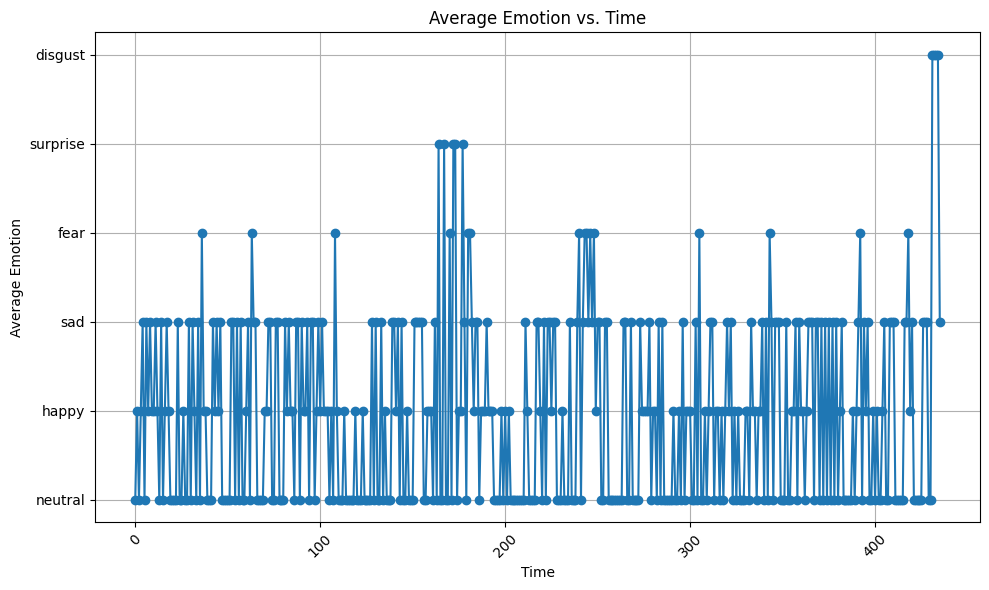

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate average emotion
def calculate_average_emotion(row):
    face_emotion = row['face_emotion']
    voice_emotion = row['voice emotion']

    # If both face and voice emotions are NaN, return NaN
    if face_emotion == "not available" and voice_emotion == "not available":
        return "not available"

    # If face emotion is NaN or voice emotion is NaN, use the other value
    elif face_emotion == "not available":
        return voice_emotion

    elif voice_emotion == "not available":
        return face_emotion

    # If both face and voice emotions are available, use only face emotion
    else:
        return face_emotion

merged_df_filled.reset_index(inplace=True)
# Apply the function to calculate average emotion for each row
merged_df_filled['average_emotion'] = merged_df_filled.apply(calculate_average_emotion, axis=1)

# Plot emotion vs. time graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['average_emotion'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Emotion')
plt.title('Average Emotion vs. Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
df = merged_df_filled

df

,time,face_emotion,voice emotion,average_emotion
0,2024-04-25 02:24:44,neutral,not available,neutral
1,2024-04-25 02:24:45,happy,not available,happy
2,2024-04-25 02:24:45,neutral,not available,neutral
3,2024-04-25 02:24:46,happy,not available,happy
4,2024-04-25 02:24:46,sad,not available,sad
...,...,...,...,...
431,2024-04-25 02:29:46,not available,disgust,disgust
432,2024-04-25 02:29:53,not available,disgust,disgust
433,2024-04-25 02:30:01,not available,disgust,disgust
434,2024-04-25 02:30:09,not available,disgust,disgust


In [55]:
import pandas as pd
from statistics import mode

# Calculate mode of the average_emotion column
mode_emotion = mode(df['average_emotion'])

print("Mode emotion:", mode_emotion)


Mode emotion: neutral


In [56]:
import pandas as pd
from collections import Counter

# Calculate mode of the average_emotion column
mode_emotions = Counter(df['average_emotion']).most_common(7)

print("Top 7 emotions based on mode:")
for emotion, count in mode_emotions:
    print(emotion, ":", count)


Top 7 emotions based on mode:
neutral : 201
sad : 117
happy : 94
fear : 15
surprise : 5
disgust : 4
